In [1]:
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot as plt
from sklearn import metrics
from random import randint
import numpy as np
import pandas as pd
import MNIST

In [2]:
x_train_mlpr = MNIST.x_train
y_train_mlpr = MNIST.y_train
x_test_mlpr = MNIST.x_test
y_test_mlpr = MNIST.y_test

In [3]:
clf_mlpr = MLPClassifier(verbose=True)

In [4]:
clf_mlpr.fit(x_train_mlpr, y_train_mlpr)

Iteration 1, loss = 3.30422708
Iteration 2, loss = 0.93878048
Iteration 3, loss = 0.49167093
Iteration 4, loss = 0.33338151
Iteration 5, loss = 0.25275325
Iteration 6, loss = 0.21285025
Iteration 7, loss = 0.18391720
Iteration 8, loss = 0.15357653
Iteration 9, loss = 0.13775811
Iteration 10, loss = 0.12919965
Iteration 11, loss = 0.12317438
Iteration 12, loss = 0.11733228
Iteration 13, loss = 0.11732075
Iteration 14, loss = 0.12100929
Iteration 15, loss = 0.11000778
Iteration 16, loss = 0.10197522
Iteration 17, loss = 0.10250638
Iteration 18, loss = 0.08955056
Iteration 19, loss = 0.09259842
Iteration 20, loss = 0.08871680
Iteration 21, loss = 0.08628032
Iteration 22, loss = 0.07760872
Iteration 23, loss = 0.07776579
Iteration 24, loss = 0.07799014
Iteration 25, loss = 0.07313503
Iteration 26, loss = 0.07284500
Iteration 27, loss = 0.06883524
Iteration 28, loss = 0.06589930
Iteration 29, loss = 0.07005826
Iteration 30, loss = 0.06732718
Iteration 31, loss = 0.06539572
Iteration 32, los

MLPClassifier(verbose=True)

In [5]:
predicted_mlpr = clf_mlpr.predict(x_test_mlpr)
expected_mlpr = y_test_mlpr

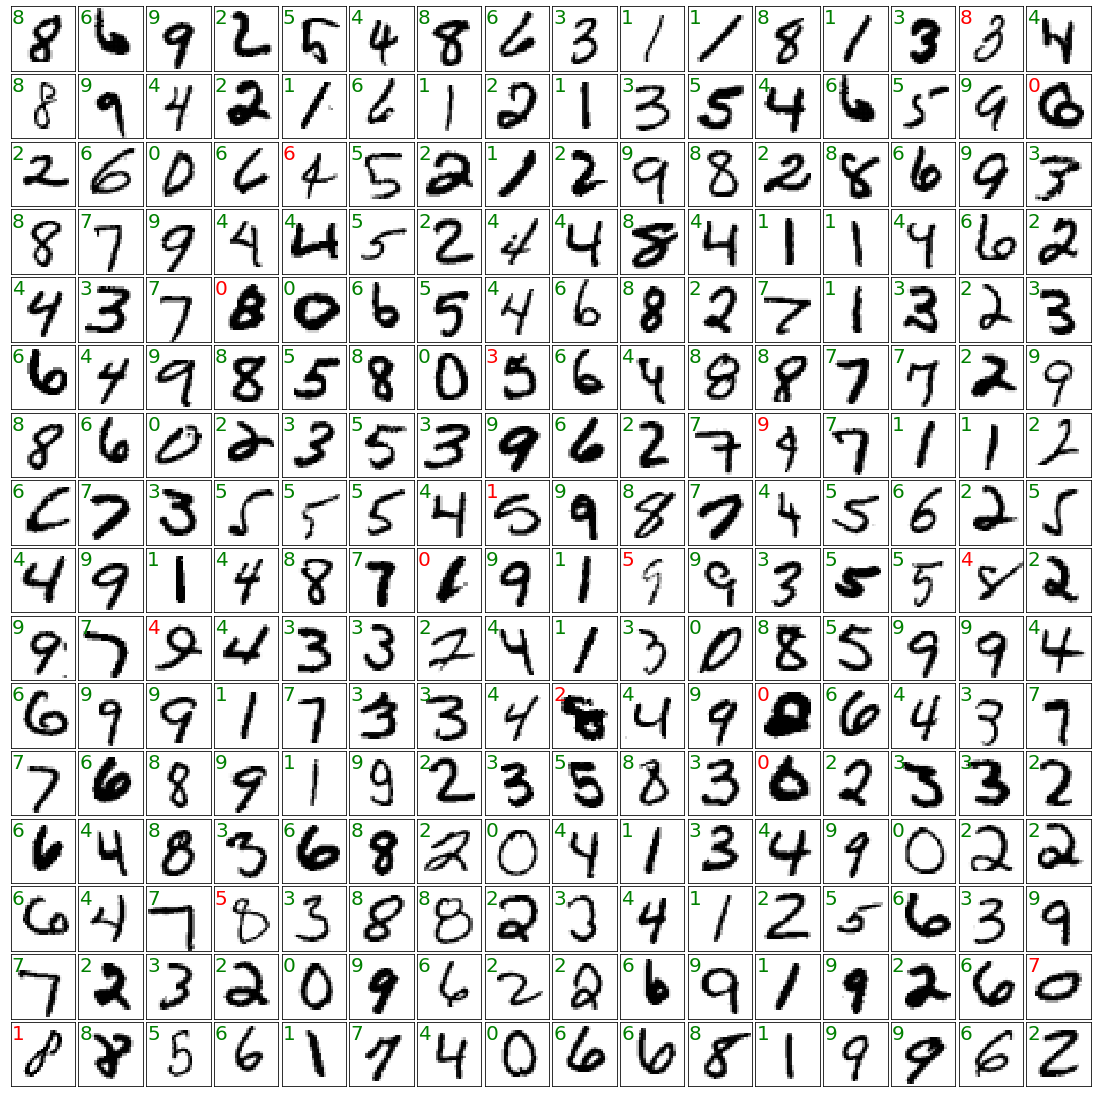

In [6]:
fig = plt.figure(figsize=(15, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for j in range(256):
    i = randint(0, len(predicted_mlpr) - 1)
    ax = fig.add_subplot(16, 16, j + 1, xticks=[], yticks=[])
    ax.imshow(x_test_mlpr.reshape(-1, 28, 28)[i], cmap=plt.cm.binary,
              interpolation='nearest')
    if predicted_mlpr[i] == expected_mlpr[i]:
        ax.text(0, 7, str(predicted_mlpr[i]), fontsize=20, color='green')
    else:
        ax.text(0, 7, str(predicted_mlpr[i]), fontsize=20, color='red')
ax.axis("on")
fig.savefig('out.png', dpi=fig.dpi, edgecolor="purple")

In [7]:
print(metrics.classification_report(expected_mlpr, predicted_mlpr))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.97      0.96      0.97      1032
           3       0.94      0.98      0.96      1010
           4       0.95      0.98      0.96       982
           5       0.97      0.94      0.95       892
           6       0.98      0.97      0.97       958
           7       0.97      0.96      0.97      1028
           8       0.97      0.95      0.96       974
           9       0.97      0.95      0.96      1009

    accuracy                           0.96     10000
   macro avg       0.97      0.96      0.96     10000
weighted avg       0.97      0.96      0.96     10000



In [8]:
d_mlpr = [array for array in metrics.confusion_matrix(expected_mlpr, predicted_mlpr)]
data_matrix_mlpr = {"0": d_mlpr[0], "1": d_mlpr[1], "2": d_mlpr[2], "3": d_mlpr[3], "4": d_mlpr[4], \
                   "5": d_mlpr[5], "6": d_mlpr[6], "7": d_mlpr[7], "8": d_mlpr[8], "9": d_mlpr[9]}
df_matrix_mlpr = pd.DataFrame(data=data_matrix_mlpr)
df_matrix_mlpr

,0,1,2,3,4,5,6,7,8,9
0,964,1,7,0,2,5,12,2,12,1
1,1,1119,5,0,1,2,3,5,4,4
2,1,4,995,10,0,1,1,13,4,1
3,3,2,6,987,2,29,0,6,11,8
4,1,1,6,0,958,2,7,5,6,21
5,0,1,1,4,0,837,6,0,6,6
6,3,1,3,0,8,4,928,0,2,0
7,4,1,5,3,0,2,1,985,3,8
8,0,5,4,6,2,7,0,3,921,5
9,3,0,0,0,9,3,0,9,5,955
